<img src="RTs Competitive guided search.png" alt="Alternative text" />

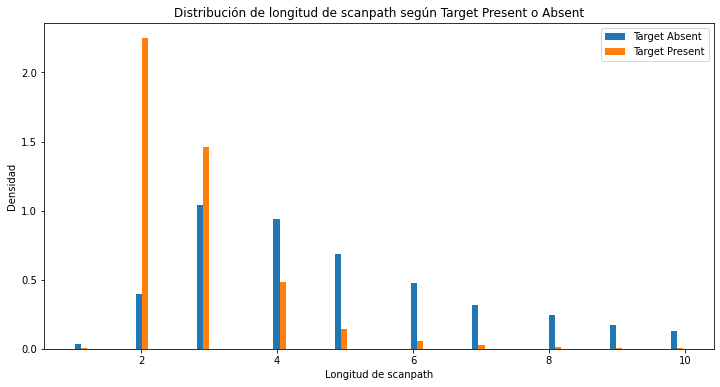

In [38]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

tp_data = np.load(path.abspath("target_present_data.npz"))

tp_fixation_nums = tp_data["fixations"]
tp_labels = tp_data["labels"]


ta_data = np.load(path.abspath("target_absent_data.npz"))

ta_fixation_nums = ta_data["fixations"]
ta_labels = ta_data["labels"]


sequence_start = np.where(ta_fixation_nums == 1)[0]
sequence_end = np.append(sequence_start[1:]-1,[ta_fixation_nums.shape[0]-1])


scanpaths_lengths_TA = ta_fixation_nums[sequence_end]
scanpaths_lengths_TA = scanpaths_lengths_TA[scanpaths_lengths_TA <11]

sequence_start = np.where(tp_fixation_nums == 1)[0]
sequence_end = np.append(sequence_start[1:]-1,[tp_fixation_nums.shape[0]-1])


scanpaths_lengths_TP = tp_fixation_nums[sequence_end]
scanpaths_lengths_TP = scanpaths_lengths_TP[scanpaths_lengths_TP <11]



fig, ax = plt.subplots(1, 1, figsize = (12,6))

ax.set_title(f"Distribución de longitud de scanpath según Target Present o Absent")
ax.set_xlabel("Longitud de scanpath")
ax.set_ylabel("Densidad")
ax.hist([scanpaths_lengths_TA, scanpaths_lengths_TP], 40, label=['Target Absent', 'Target Present'],density=True)
ax.legend(loc='upper right');


